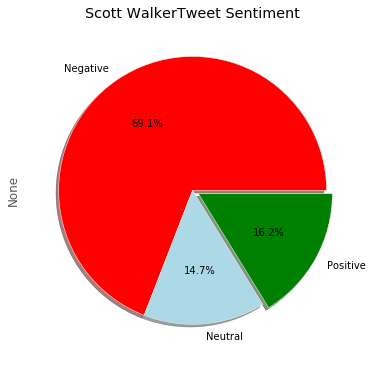

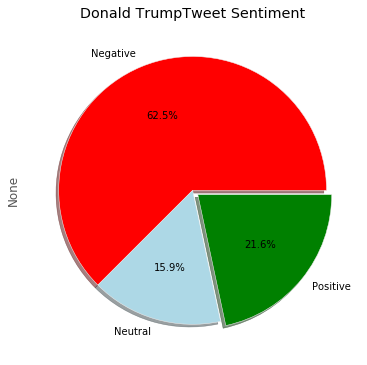

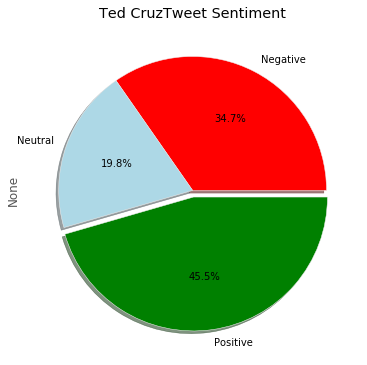

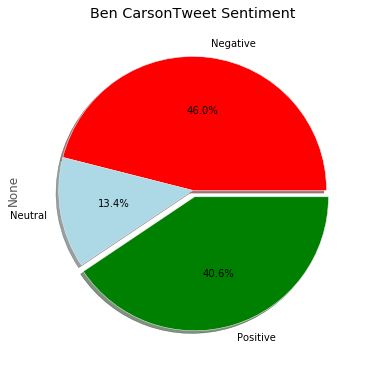

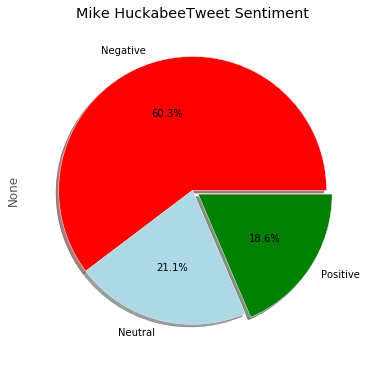

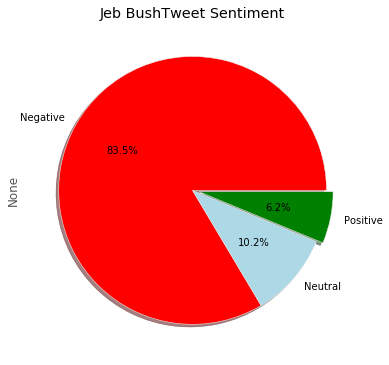

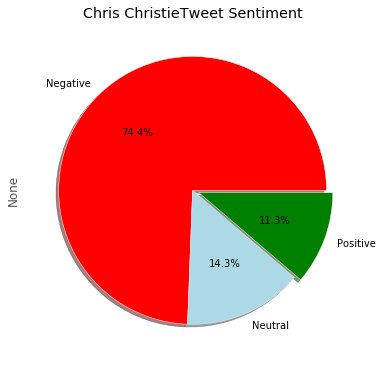

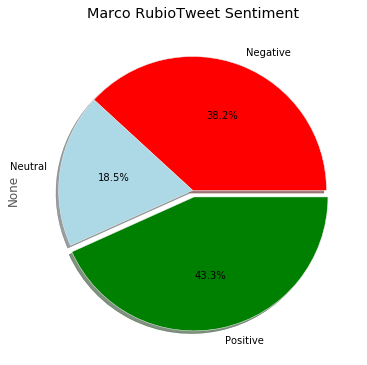

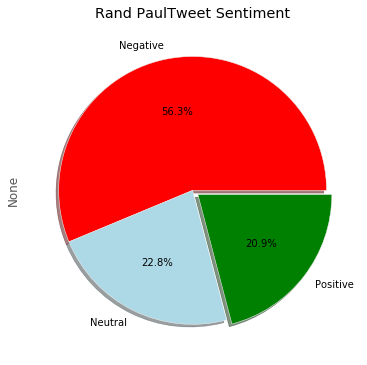

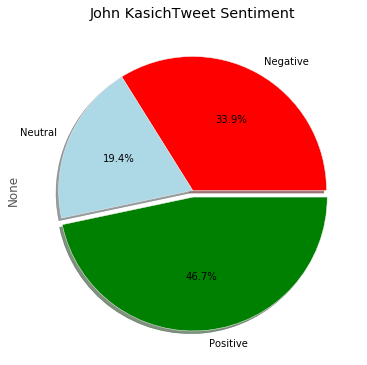

sentiment                                                    \
subject_matter  Abortion FOX News or Moderators Foreign Policy Gun Control   
candidate                                                                    
Donald Trump    Negative               Negative       Negative    Negative   
Jeb Bush        Negative               Negative       Negative    Negative   
Mike Huckabee   Negative               Negative       Negative    Negative   

                                                                             \
subject_matter Healthcare (including Medicare) Immigration Jobs and Economy   
candidate                                                                     
Donald Trump                          Positive    Negative         Negative   
Jeb Bush                              Negative    Negative         Negative   
Mike Huckabee                         Positive    Positive         Negative   

                                                    \
subject_matter LGBT issues Racial issues  Religion   
candidate                                            
Donald Trump      Negative      Negative  Negative   
Jeb Bush          Negative      Negative  Positive   
Mike Huckabee     Negative      Negative  Negative   

                                                     
subject_matter Women's Issues (not abortion though)  
candidate                                            
Donald Trump                               Negative  
Jeb Bush                                   Positive  
Mike Huckabee                              Negative

In [41]:

import pandas as pd
import json
import csv
import numpy 
from scipy.stats import mode
import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib import style
plt.style.use('ggplot')

mycsv = pd.read_csv('/users/brianjenney/desktop/datascience/Sentiment.csv', header=0)

df = pd.DataFrame(mycsv)

# #remove all non-identified candidates
df = df[df.candidate != 'No candidate mentioned']

candidates =  df['candidate'].unique()

for c in candidates:
    try:
        dt_df = df[df['candidate'] == c]
        sentiment_by_candidate = dt_df.groupby('sentiment').size()        
        sentiment_by_candidate.plot(kind = "pie" , colors=['red', 'lightblue', 'green'], explode=[0,0,0.05], title = c + "Tweet Sentiment" , autopct='%1.1f%%', shadow=True, figsize=[6,6])
        plt.show()
    except:
        print ''

#remove all non categorized subject matter
df = df[df.subject_matter != 'None of the above']


#map string values to int
mapping = {'Positive': 1, 'Negative': 2, 'Neutral' : 3}

df = df.replace({'sentiment': mapping})

df['sentiment'] = df['sentiment'].astype(int)

df = df.groupby(['candidate', 'sentiment', 'subject_matter']).size().reset_index()

df = pd.pivot_table(df, index=['candidate'], columns=['subject_matter'], values=['sentiment'])

df = df.dropna()


df[df>=2] = 'Negative'
df[df<2] = 'Positive'

df.head()